In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import psycopg2

In [2]:
# establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="dvdrental",
    user="postgres",
    password="1234"
)

In [3]:
# create a cursor object
cur = conn.cursor()

In [4]:
# Which actors have appeared in the most films in each category?

query1 = """
WITH actor_film_count AS (
  SELECT fa.actor_id, c.name AS category_name, COUNT(*) AS film_count
  FROM film_actor fa
  JOIN film_category fc ON fa.film_id = fc.film_id
  JOIN category c ON fc.category_id = c.category_id
  GROUP BY 1, 2
), max_film_count AS (
  SELECT category_name, MAX(film_count) AS max_count
  FROM actor_film_count
  GROUP BY 1
)
SELECT a.first_name || ' ' || a.last_name AS actor_name, c.name AS category_name, afc.film_count
FROM actor_film_count afc
JOIN max_film_count mfc ON afc.category_name = mfc.category_name AND afc.film_count = mfc.max_count
JOIN actor a ON afc.actor_id = a.actor_id
JOIN category c ON afc.category_name = c.name
ORDER BY category_name;
"""

cur.execute(query1)

query1_rows = cur.fetchall()

for row in query1_rows:
    print(row)

('Natalie Hopkins', 'Action', 6)
('Morgan Williams', 'Animation', 6)
('Jayne Nolte', 'Animation', 6)
('Helen Voight', 'Children', 7)
('Greg Chaplin', 'Classics', 6)
('Bela Walken', 'Comedy', 6)
('Dustin Tautou', 'Documentary', 6)
('Frances Day-Lewis', 'Documentary', 6)
('Ed Chase', 'Documentary', 6)
('Grace Mostel', 'Drama', 7)
('Mae Hoffman', 'Family', 6)
('Humphrey Willis', 'Foreign', 7)
('William Hackman', 'Games', 5)
('Rip Winslet', 'Games', 5)
('Matthew Carrey', 'Games', 5)
('Julia Mcqueen', 'Horror', 7)
('Ewan Gooding', 'Music', 5)
('Audrey Bailey', 'Music', 5)
('Salma Nolte', 'Music', 5)
('Warren Nolte', 'Music', 5)
('Sidney Crowe', 'New', 7)
('Gina Degeneres', 'Sci-Fi', 7)
('Ben Willis', 'Sports', 9)
('Morgan Hopkins', 'Travel', 5)
('Nick Stallone', 'Travel', 5)
('Olympia Pfeiffer', 'Travel', 5)


In [5]:
query1_result = pd.DataFrame(query1_rows,
                             columns=['actor', 'genre', 'film_count'])
query1_result

,actor,genre,film_count
0,Natalie Hopkins,Action,6
1,Morgan Williams,Animation,6
2,Jayne Nolte,Animation,6
3,Helen Voight,Children,7
4,Greg Chaplin,Classics,6
5,Bela Walken,Comedy,6
6,Dustin Tautou,Documentary,6
7,Frances Day-Lewis,Documentary,6
8,Ed Chase,Documentary,6
9,Grace Mostel,Drama,7


In [6]:
sns.set(style='whitegrid', palette='pastel', font_scale=1.2, rc={'figure.figsize':(10,6)})

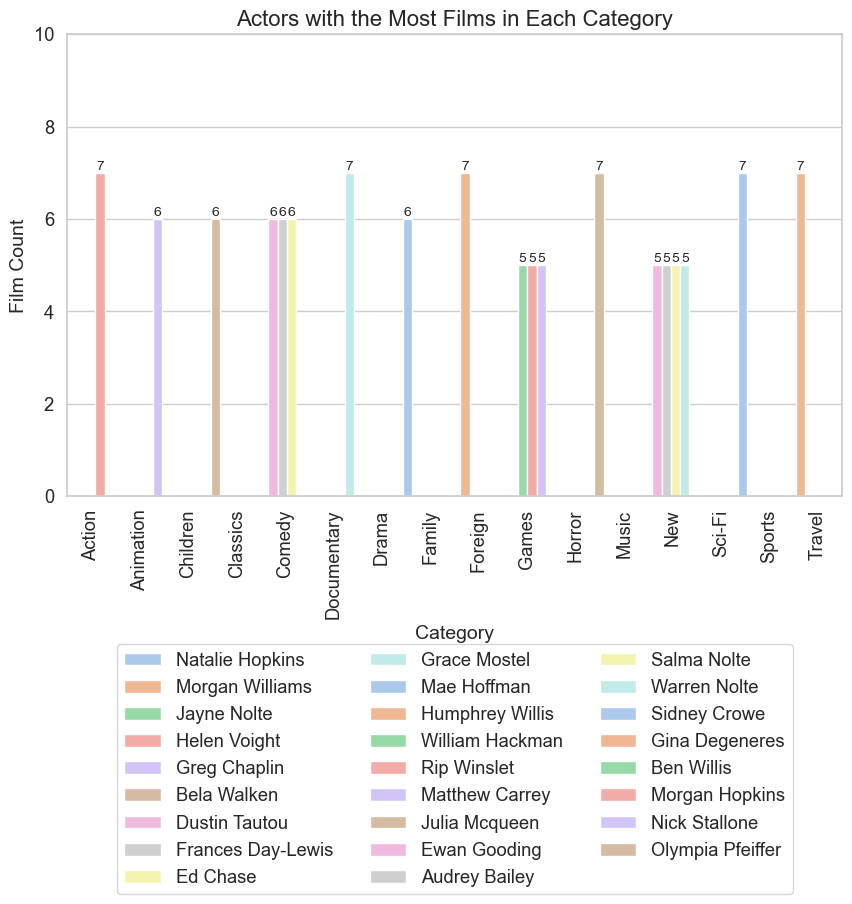

In [11]:
# create a bar plot of the query results using seaborn
sns.barplot(x='genre',
            y='film_count',
            hue='actor',
            data=query1_result,
            palette="pastel",
            width=5)
# add labels to the bars
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
# set the title and axes labels
plt.xlabel("Category", fontsize=14)
plt.ylabel("Film Count", fontsize=14)
plt.title("Actors with the Most Films in Each Category", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# set the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
# setting limit
ax.set_ylim([0, 10])

# # adjust the figure size
# plt.figure(figsize=(10, 6))

plt.show()

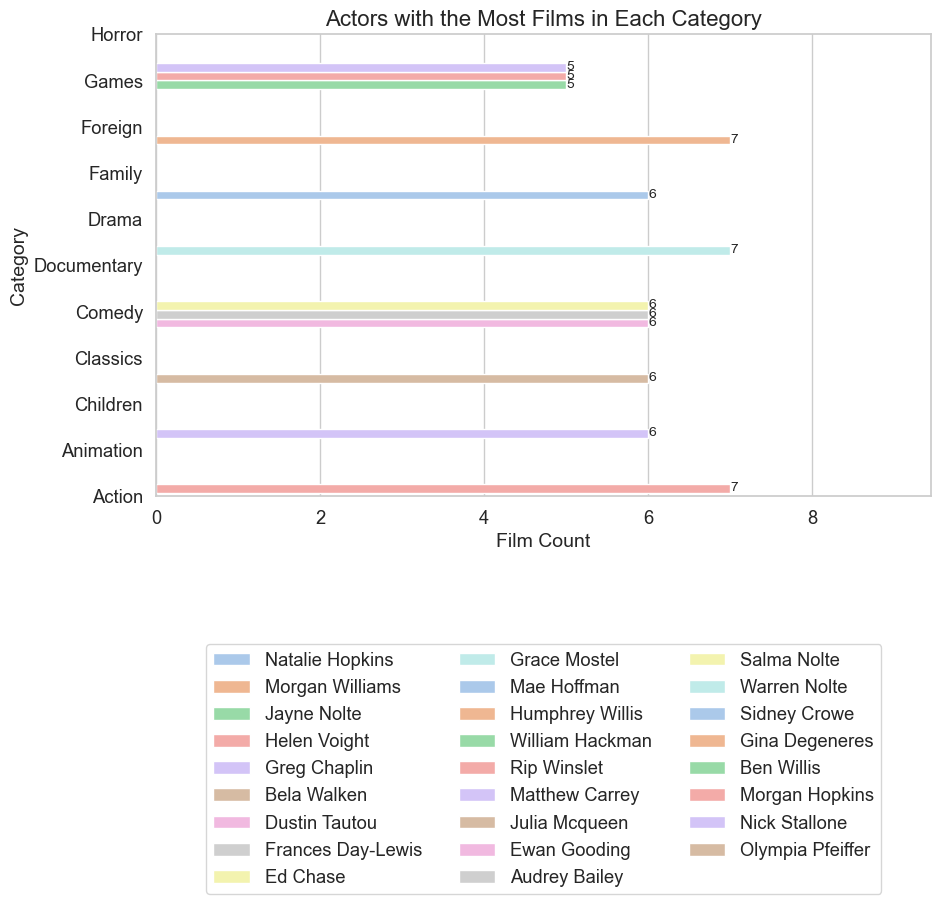

In [17]:
# create a bar plot of the query results using seaborn
sns.barplot(y='genre',
            x='film_count',
            hue='actor',
            data=query1_result,
            palette="pastel",
            width=5)
# add labels to the bars
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
# set the title and axes labels
plt.ylabel("Category", fontsize=14)
plt.xlabel("Film Count", fontsize=14)
plt.title("Actors with the Most Films in Each Category", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
# set the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
# setting limit
ax.set_ylim([0, 10])

# # adjust the figure size
# plt.figure(figsize=(10, 6))

plt.show()

/var/folders/3l/nwq5rz5s7l9f7jmmh5x92myw0000gn/T/ipykernel_36662/601435546.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


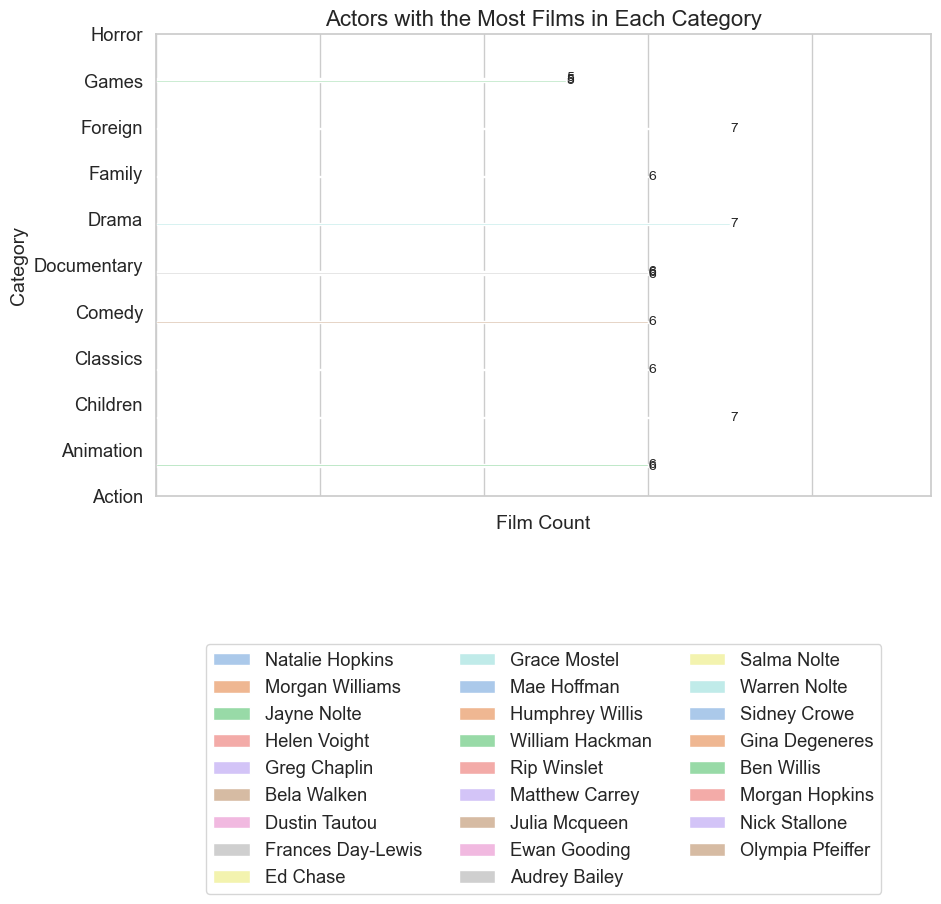

In [8]:
# create a bar plot of the query results using seaborn
sns.barplot(y='genre',
            x='film_count',
            hue='actor',
            data=query1_result,
            palette="pastel")
# add labels to the bars
ax = plt.gca()
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)
# set the title and axes labels
plt.ylabel("Category", fontsize=14)
plt.xlabel("Film Count", fontsize=14)
plt.title("Actors with the Most Films in Each Category", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# set the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
# setting limit
ax.set_ylim([0, 10])

# # adjust the figure size
# plt.figure(figsize=(10, 6))

plt.show()

In [19]:
# Group actors by film count per category
grouped_actors = query1_result.groupby(['genre', 'film_count']).agg({'actor': lambda x: ','.join(x)}).reset_index()

# Assign group numbers to each group of actors based on film count
grouped_actors['group_num'] = grouped_actors.groupby('genre')['film_count'].rank(method='dense').astype(int)

# Map group numbers to colors
color_map = {1: 'blue', 2: 'red', 3: 'green'}

# Create a new column that contains the color for each group of actors
grouped_actors['color'] = grouped_actors['group_num'].map(color_map)

# Plot the grouped data using a bar plot with hue based on group color
fig = px.bar(query1_result, x="genre", y="film_count", color="actor", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  xaxis=dict(title="Genre", tickangle=90), yaxis=dict(title="Film Count"))


# Rotate x-axis labels to be vertical
fig.update_layout(xaxis_tickangle=-90)

# Show the plot
fig.show()

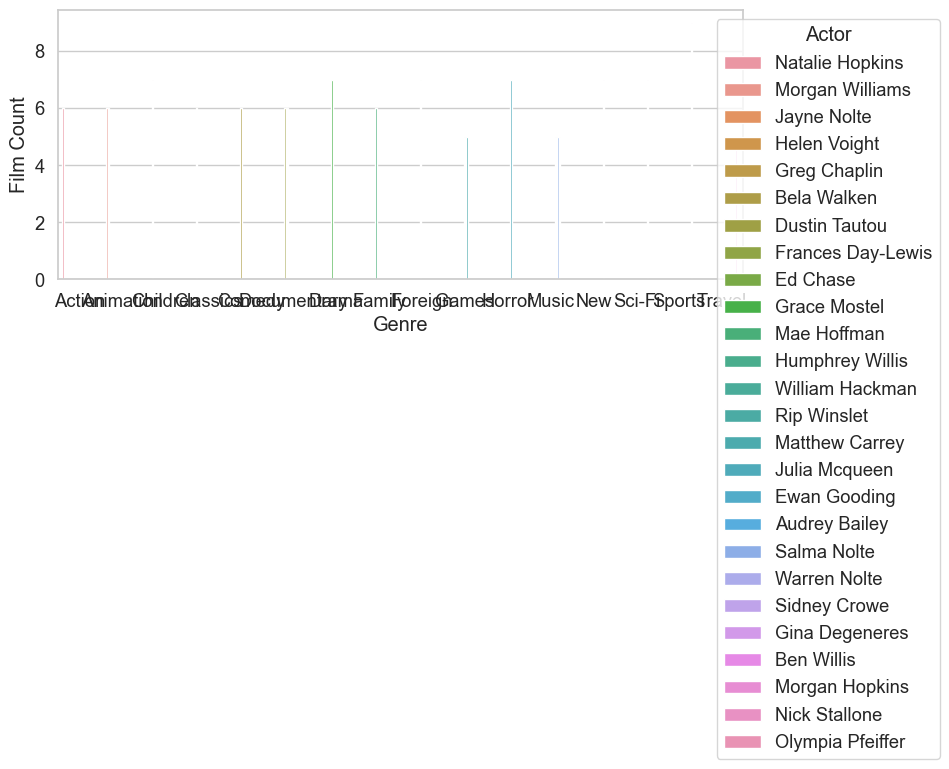

In [9]:
ax = sns.barplot(x="genre", y="film_count", data=query1_result, hue="actor")
ax.set_xlabel("Genre")
ax.set_ylabel("Film Count")
ax.legend(title="Actor", loc="upper right", bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

In [12]:
!pip install nbformat --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0


In [16]:
fig = px.bar(query1_result, x="genre", y="film_count", color="actor", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  xaxis=dict(title="Genre", tickangle=90), yaxis=dict(title="Film Count"))

fig.show()

In [20]:
fig = px.bar(query1_result, x="genre", y="film_count", color="actor", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  xaxis=dict(title="Genre", tickangle=90), yaxis=dict(title="Film Count"))
fig.show()


In [22]:
color_map = {actor: color for actor, color in zip(query1_result["actor"].unique(), px.colors.qualitative.Pastel)}

fig = px.bar(query1_result, x="genre", y="film_count", color="actor", barmode="group",
             color_discrete_map=color_map)

fig.show()

In [23]:
# create a new column that groups actors with the same film count per category
query1_result['actor_group'] = query1_result.groupby(
    ['genre',
     'film_count'])['actor'].transform(lambda x: ', '.join(sorted(set(x))))

# create the bar chart with the new 'actor_group' column as the color parameter
fig = px.bar(query1_result,
             x="genre",
             y="film_count",
             color="actor_group",
             barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# add other layout and style options
fig.update_layout(width=1000,
                  height=600,
                  showlegend=True,
                  legend=dict(title="Actor Group"),
                  margin=dict(l=50, r=50, t=50, b=50),
                  font=dict(family="Helvetica", size=16),
                  xaxis=dict(title="Genre", tickangle=-90),
                  yaxis=dict(title="Film Count"))
fig.show()

In [24]:

fig = px.bar(query1_result, y="genre", x="film_count", color="actor", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  yaxis=dict(title="Genre"), xaxis=dict(title="Film Count"))
fig.show()


In [25]:

fig = px.bar(query1_result, y="genre", x="film_count", color="actor", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  yaxis=dict(title="Genre", automargin=True), xaxis=dict(title="Film Count"))
fig.show()


In [26]:
# Group actors by their film count per genre
grouped_df = query1_result.groupby(['genre', 'film_count']).agg({'actor': lambda x: ', '.join(x)}).reset_index()

# Add a new column that groups actors by their film count per genre
grouped_df['actor_group'] = grouped_df.groupby('genre')['film_count'].transform(lambda x: pd.factorize(x)[0])

# Create a horizontal bar chart with the actor_group column as the hue
fig = px.bar(grouped_df, x="film_count", y="genre", color="actor_group", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Pastel, orientation='h')
fig.update_layout(width=1000, height=600, showlegend=True, legend=dict(title="Actor Group"),
                  margin=dict(l=50, r=50, t=50, b=50), font=dict(family="Helvetica", size=16),
                  xaxis=dict(title="Film Count"), yaxis=dict(title="Genre"))
fig.show()


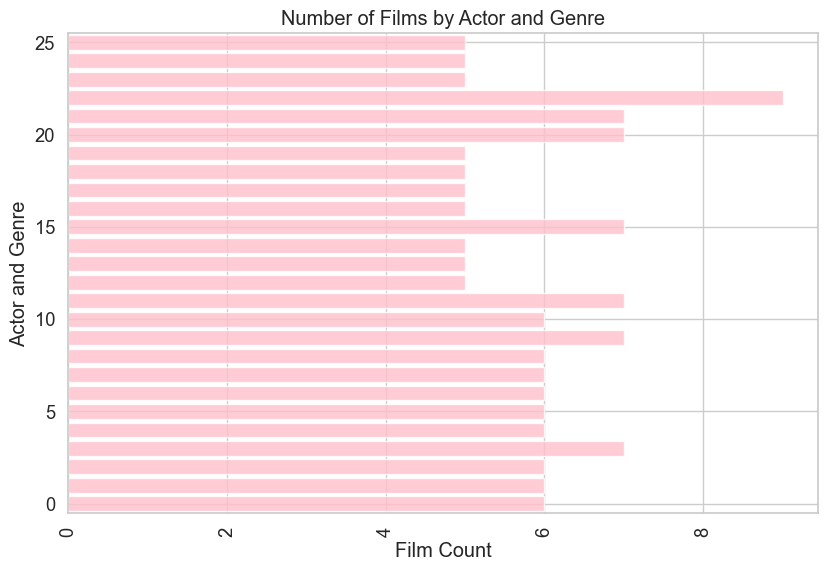

In [70]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(query1_result.index, query1_result['film_count'], height=0.8, color='pink', alpha=0.8)

# Adjust the padding and x-axis labels rotation
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9)
plt.xticks(rotation=90)

# Set the chart title and axis labels
ax.set_title('Number of Films by Actor and Genre')
ax.set_xlabel('Film Count')
ax.set_ylabel('Actor and Genre')

# Set the y-axis limits to ensure all bars fit inside the chart
ax.set_ylim([-0.5, len(query1_result.index)-0.5])

# Show the plot
plt.show()


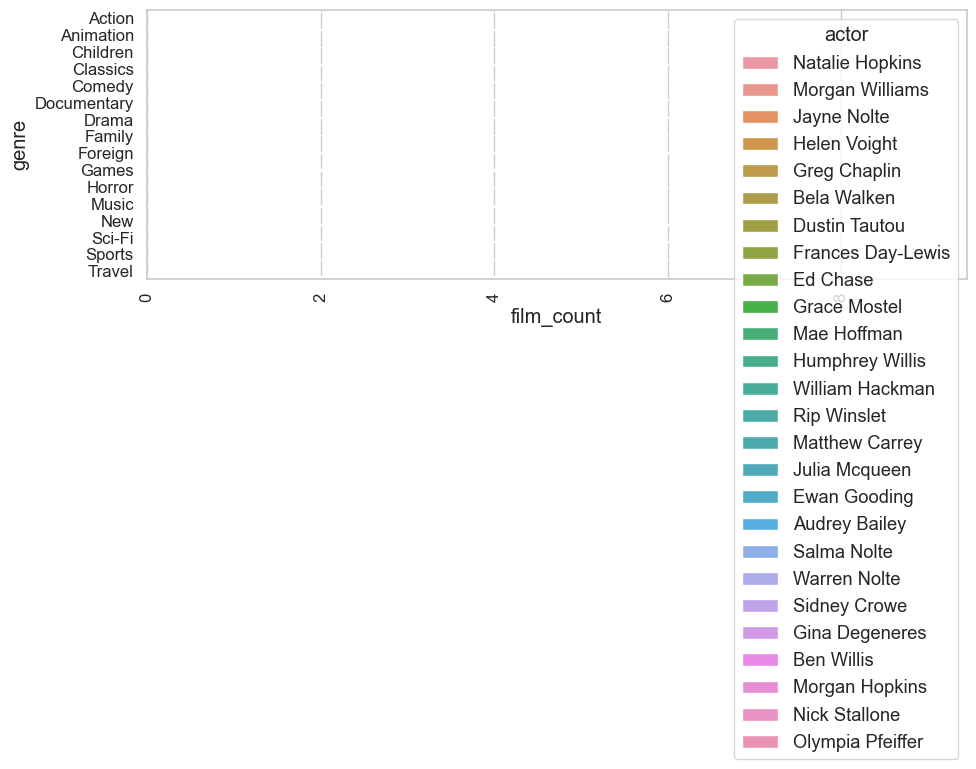

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x='film_count', y='genre', hue='actor', data=query1_result)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


/var/folders/3l/nwq5rz5s7l9f7jmmh5x92myw0000gn/T/ipykernel_34953/287633228.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


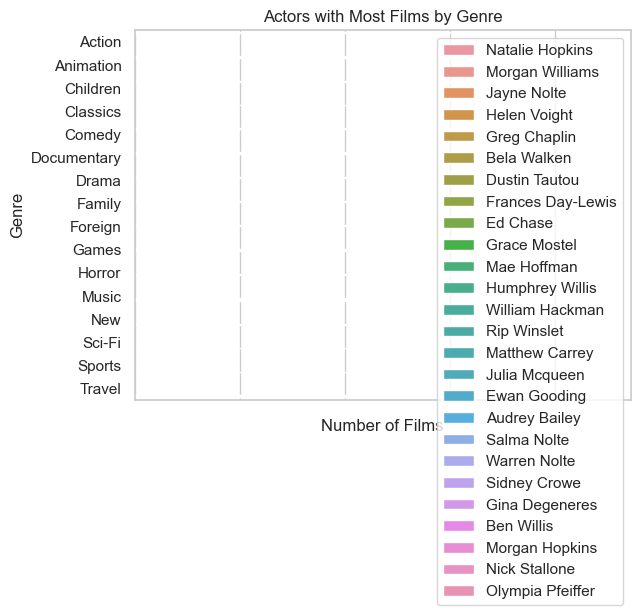

In [58]:
# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the horizontal barplot
ax = sns.barplot(x='film_count', y='genre', hue='actor', data=query1_result)

# Set the title and axis labels
ax.set_title('Actors with Most Films by Genre')
ax.set_xlabel('Number of Films')
ax.set_ylabel('Genre')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove the legend title
ax.legend(title=None)

# Show the plot
plt.show()


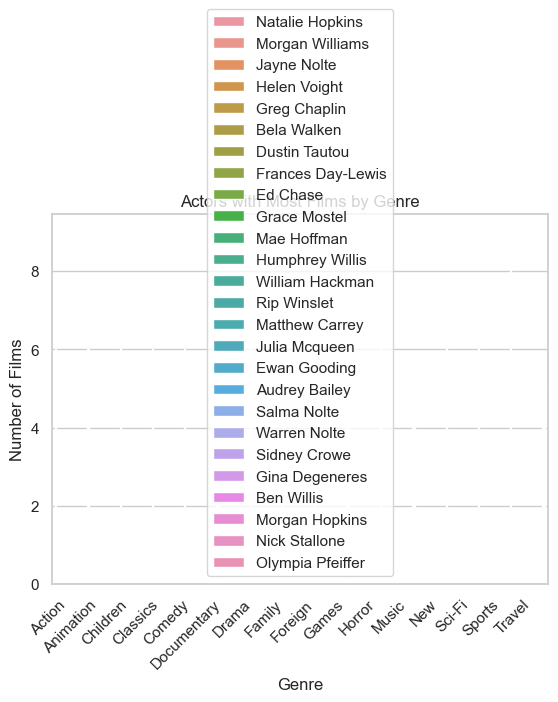

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the vertical barplot
ax = sns.barplot(x='genre', y='film_count', hue='actor', data=query1_result)

# Set the title and axis labels
ax.set_title('Actors with Most Films by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Films')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove the legend title
ax.legend(title=None)

# Show the plot
plt.show()

In [ ]:
# create a horizontal bar chart of the query results using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="film_count", y="genre", hue="actor", data=query1_result, palette="pastel")
plt.xlabel("Film Count", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.title("Actors with the Most Films in Each Category", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [29]:
# close the cursor and database connection
cur.close()
conn.close()